In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,90,96,71,159,37.8,1.747,60,1
1,14,194,116,10,522,52.8,1.103,25,1
2,10,190,41,63,649,48.0,1.699,41,0
3,7,95,49,76,589,39.4,0.725,34,0
4,6,84,34,80,76,41.6,0.800,24,0
...,...,...,...,...,...,...,...,...,...
495,11,178,89,36,435,40.1,1.909,76,0
496,7,96,92,14,282,30.4,0.742,47,1
497,3,197,115,34,561,47.8,0.915,66,1
498,7,60,31,91,606,44.4,2.241,28,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.3 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,7.754000,123.502000,74.66800,48.898000,444.140000,37.36140,1.274010,50.938000,0.488000
std,5.089724,43.502632,26.16691,28.845515,237.351275,12.83664,0.716521,17.865624,0.500357
min,0.000000,50.000000,30.00000,0.000000,6.000000,15.10000,0.050000,21.000000,0.000000
25%,3.000000,87.000000,53.00000,24.000000,236.750000,26.60000,0.710500,36.000000,0.000000
50%,7.000000,122.000000,74.00000,47.000000,455.500000,38.00000,1.242500,51.000000,0.000000
75%,12.000000,161.000000,96.25000,74.000000,647.500000,48.02500,1.915250,67.250000,1.000000
max,16.000000,199.000000,121.00000,99.000000,845.000000,59.90000,2.495000,80.000000,1.000000


Text(0.5, 1.0, 'correlation heatMap')

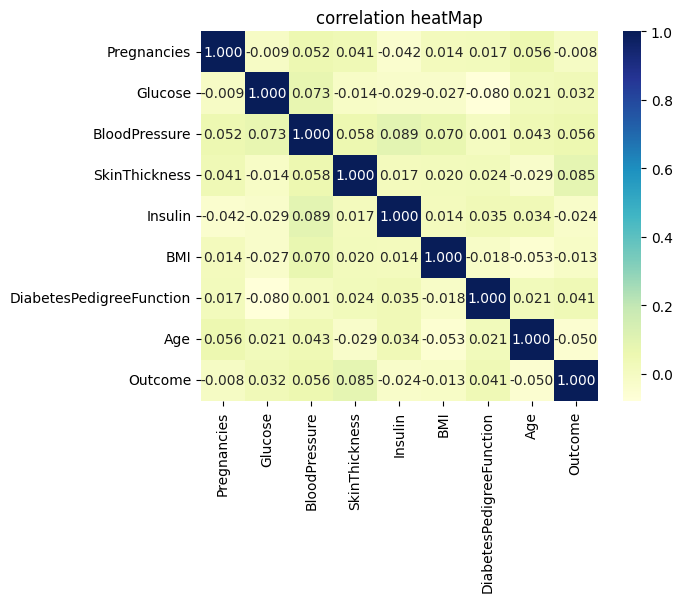

In [6]:
sns.heatmap(df.corr(),annot=True,fmt='.3f',cmap="YlGnBu")
plt.title("correlation heatMap")

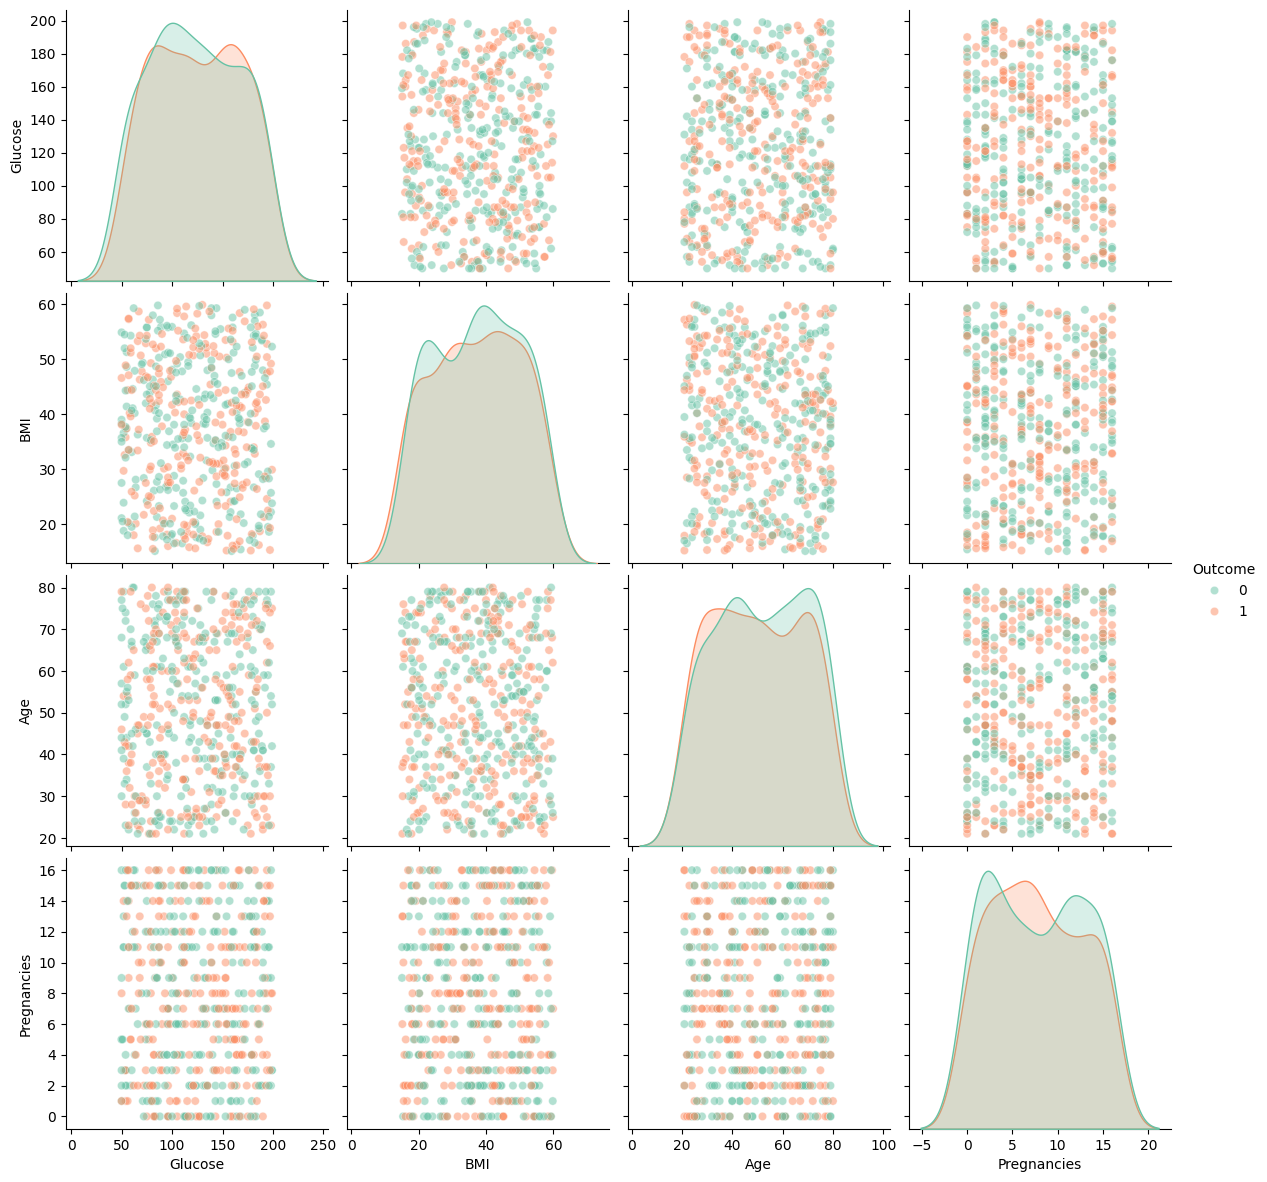

In [7]:
corr = df.corr()["Outcome"].abs().sort_values(ascending=False)
sns.pairplot(
    df[["Glucose", "BMI", "Age", "Pregnancies", "Outcome"]],
    hue="Outcome",
    diag_kind="kde",
    palette="Set2",
    height=3,
    plot_kws={'alpha':0.5}
)



In [8]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [11]:
#using KNN

from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    training_accuracy.append(knn.score(x_train_scaled,y_train))
    test_accuracy.append(knn.score(x_test_scaled,y_test))

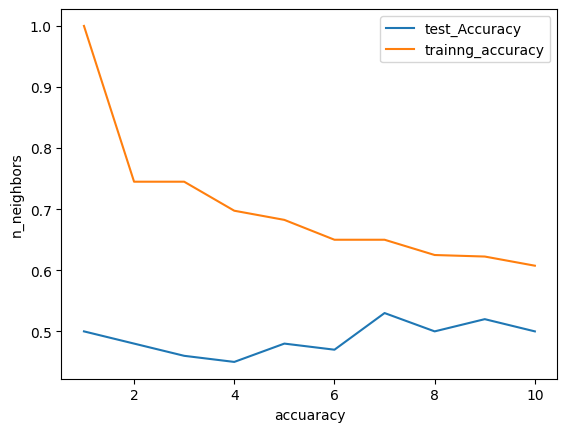

In [12]:
plt.plot(range(1,11),test_accuracy,label='test_Accuracy')
plt.plot(range(1,11),training_accuracy,label='trainng_accuracy')
plt.xlabel('accuaracy')
plt.ylabel('n_neighbors')
plt.legend()

In [13]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))


0.6425
0.48


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


[[25 27]
 [25 23]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        52
           1       0.46      0.48      0.47        48

    accuracy                           0.48       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.48      0.48      0.48       100



In [15]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, x, y, cv=5).mean())


0.47400000000000003


In [16]:
#prediction for new input
new_input = np.array([[2, 130, 70, 25, 80, 28.1, 1.5, 35]])
prediction = knn.predict(new_input)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("⚠️ Likely to have diabetes")
else:
    print("✅ Unlikely to have diabetes")



Prediction: [0]
✅ Unlikely to have diabetes


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [17]:
#using decisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.735
0.51


In [18]:
#prediction for new input
new_input = np.array([[2, 130, 70, 25, 80, 28.1, 1.5, 35]])
prediction = dt.predict(new_input)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("⚠️ Likely to have diabetes")
else:
    print("✅ Unlikely to have diabetes")



Prediction: [1]
⚠️ Likely to have diabetes


c:\Users\gulab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
